In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [7]:
with open('AA_channels.pkl', 'rb') as f:
    channel_list_AA = pickle.load(f)
with open('1wS_channels.pkl', 'rb') as f:
    channel_list_1wS = pickle.load(f)

# Correlation Function

In [16]:
autocorrs_AA = np.load("channel_correlation_AA.npy")
autocorrs_1wS = np.load("channel_correlation_1wS.npy")

In [17]:
plt.rcParams.update({
    'font.size': 18,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'legend.frameon': False,
    'axes.grid': False,
    'font.family': 'sans-serif'
})

4


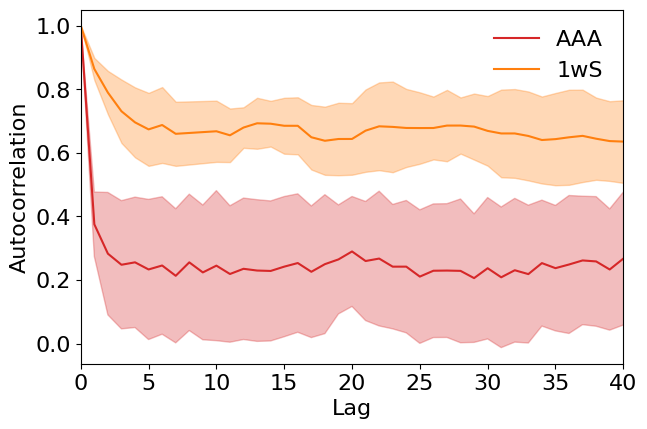

In [18]:
n_groups = 3  
group_size = autocorrs_AA.shape[0] // n_groups

grouped = []
for i in range(n_groups):
    start = i * group_size
    end = (i+1) * group_size
    grouped.append(np.mean(autocorrs_AA[start:end], axis=0))

grouped = np.array(grouped)   # shape = (n_groups, n_lags)

autocorrs_mean = np.mean(grouped, axis=0)
autocorrs_std  = np.std(grouped, axis=0)

lags = np.arange(autocorrs_AA.shape[1])

plt.figure(figsize=(7,4.6))
plt.plot(lags, autocorrs_mean, label="AAA", color='#d62728')
plt.fill_between(lags,
                 autocorrs_mean - autocorrs_std,
                 autocorrs_mean + autocorrs_std,
                 color='#d62728', alpha=0.3)


group_size = autocorrs_1wS.shape[0] // n_groups
print(group_size)
grouped = []
for i in range(n_groups):
    start = i * group_size
    end = (i+1) * group_size
    grouped.append(np.mean(autocorrs_1wS[start:end], axis=0))

grouped = np.array(grouped)   

autocorrs_mean = np.mean(grouped, axis=0)
autocorrs_std  = np.std(grouped, axis=0)

lags = np.arange(autocorrs_1wS.shape[1])


plt.plot(lags, autocorrs_mean, label="1wS", color='#ff7f0e')
plt.fill_between(lags,
                 autocorrs_mean - autocorrs_std,
                 autocorrs_mean + autocorrs_std,
                 color='#ff7f0e', alpha=0.3)

plt.xlim(0,40)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.legend()
plt.show()



# Transition Plots

In [19]:
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 14,
    'legend.frameon': False,
    'axes.grid': True
})

In [20]:
from cmap import Colormap
import cmasher as cmr
import matplotlib.colors as mcolors

# Original colormap
cm = Colormap('seaborn:flare')
#cm = Colormap('cmasher:guppy')
#cm = Colormap('seaborn:rocket')
mpl_cm = cm.to_mpl().reversed()

cmap_colors = mpl_cm(np.linspace(0, 1, 256))

n_colors = 12
indices = np.linspace(0, len(cmap_colors)-1, n_colors).astype(int)
colors_12 = cmap_colors[indices]


/scratch_local/ipykernel_238676/1781388044.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(x_values, channel_list, s=3, c=colors_12[run_idx])
/scratch_local/ipykernel_238676/1781388044.py:51: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[1].scatter(x_values, channel_list, s=3, c=colors_12[run_idx])


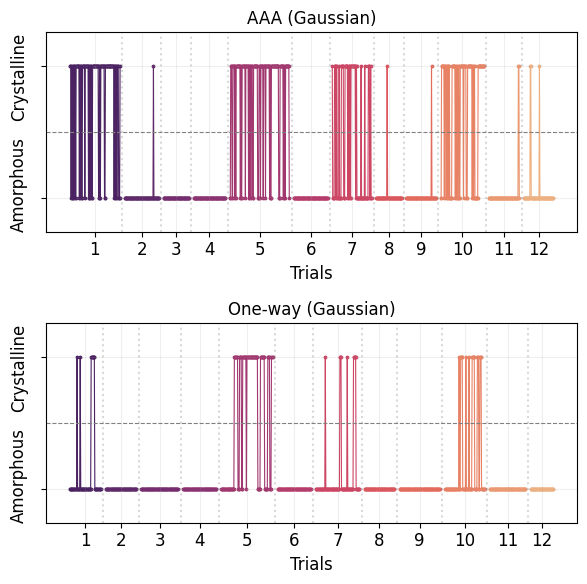

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=False)

# ---------- First subplot ----------
spacing = 10
current_x = 0  
xticks = []
xticklabels = []

for run_idx, channel_list in enumerate(channel_list_AA):
    x_values = np.arange(len(channel_list)) + current_x

    axes[0].plot(x_values, channel_list, lw=0.8, c=colors_12[run_idx])
    axes[0].scatter(x_values, channel_list, s=3, c=colors_12[run_idx])

    if len(x_values) > 0:
        # Store midpoint for xtick
        xticks.append((x_values[0] + x_values[-1]) / 2)
        xticklabels.append(str(run_idx + 1))

    current_x = x_values[-1] + spacing if len(x_values) > 0 else current_x + spacing

    if run_idx > 0 and len(x_values) > 0:
        axes[0].axvline(x=x_values[0] - spacing/2, color='gray', linestyle=':', alpha=0.3)

axes[0].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axes[0].set_xlabel("Trials")

# Y-axis labels
axes[0].set_yticks([-1, 1])
axes[0].set_yticklabels([])
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticklabels)

axes[0].text(-0.05, 0, "Amorphous", rotation=90, va="bottom", ha="center", transform=axes[0].transAxes)
axes[0].text(-0.05, 1, "Crystalline", rotation=90, va="top", ha="center", transform=axes[0].transAxes)

axes[0].set_ylim(-1.5, 1.5)
axes[0].grid(True, alpha=0.2)
axes[0].set_title("AAA (Gaussian)")

# ---------- Second subplot ----------
spacing = 10
current_x = 0  
xticks = []
xticklabels = []

for run_idx, channel_list in enumerate(channel_list_1wS):
    x_values = np.arange(len(channel_list)) + current_x

    axes[1].plot(x_values, channel_list, lw=0.8, c=colors_12[run_idx])
    axes[1].scatter(x_values, channel_list, s=3, c=colors_12[run_idx])

    if len(x_values) > 0:
        xticks.append((x_values[0] + x_values[-1]) / 2)
        xticklabels.append(str(run_idx + 1))

    current_x = x_values[-1] + spacing if len(x_values) > 0 else current_x + spacing

    if run_idx > 0 and len(x_values) > 0:
        axes[1].axvline(x=x_values[0] - spacing/2, color='gray', linestyle=':', alpha=0.3)

axes[1].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axes[1].set_xlabel("Trials")

axes[1].set_yticks([-1, 1])
axes[1].set_yticklabels([])
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticklabels)

axes[1].text(-0.05, 0, "Amorphous", rotation=90, va="bottom", ha="center", transform=axes[1].transAxes)
axes[1].text(-0.05, 1, "Crystalline", rotation=90, va="top", ha="center", transform=axes[1].transAxes)

axes[1].set_ylim(-1.5, 1.5)
axes[1].grid(True, alpha=0.2)
axes[1].set_title("One-way (Gaussian)")

plt.tight_layout()
plt.savefig("../figures/channel_switches_combined", dpi=500)
plt.show()


# Counting Transitions

In [28]:
def count_channel_switches(arr):
    if len(arr) <= 1:
        return 0
    return np.sum(np.diff(arr) != 0)

In [29]:
channel_switches_AA = []
switch_percentage_AA = []
switch_percentage_high_T_AA = []
switch_percentage_low_T_AA = []
transition_opportunities_AA = []

for batch in channel_list_AA:
    switches = count_channel_switches(batch)
    channel_switches_AA.append(switches)
    transition_opportunities_AA.append(len(batch)-1)
    switch_percentage_AA.append(switches/len(batch))
    
    if switches > 10:
        switch_percentage_high_T_AA.append(switches/(len(batch)-1))
    else:
        switch_percentage_low_T_AA.append(switches/(len(batch)-1))

In [30]:
channel_switches_1wS = []
switch_percentage_1wS = []
switch_percentage_high_T_1wS = []
switch_percentage_low_T_1wS = []
transition_opportunities_1wS = []

for batch in channel_list_1wS:
    switches = count_channel_switches(batch)
    channel_switches_1wS.append(switches)
    transition_opportunities_1wS.append(len(batch)-1)
    switch_percentage_1wS.append(switches/len(batch))
    
    if switches > 4:
        switch_percentage_high_T_1wS.append(switches/(len(batch)-1))
    else:
        switch_percentage_low_T_1wS.append(switches/(len(batch)-1))

In [31]:
print(f'The mean high transition switch percentage of AA is {np.mean(switch_percentage_high_T_AA)} +- {np.std(switch_percentage_high_T_AA)}.')
print(f'The mean high transition switch percentage of 1wS is {np.mean(switch_percentage_high_T_1wS)} +- {np.std(switch_percentage_high_T_1wS)}.')

The mean high transition switch percentage of AA is 0.331745641139766 +- 0.018961862009253747.
The mean high transition switch percentage of 1wS is 0.1287360112407978 +- 0.03489462288347945.


In [32]:
print(f'The mean low transition switch percentage of AA is {np.mean(switch_percentage_low_T_AA)} +- {np.std(switch_percentage_low_T_AA)}.')
print(f'The mean low transition switch percentage of 1wS is {np.mean(switch_percentage_low_T_1wS)} +- {np.std(switch_percentage_low_T_1wS)}.')

The mean low transition switch percentage of AA is 0.023187616177354986 +- 0.02070434609632712.
The mean low transition switch percentage of 1wS is 0.0 +- 0.0.


In [33]:
print(f'The mean switch percentage of AA is {np.mean(switch_percentage_AA)} +- {np.std(switch_percentage_AA)}.')
print(f'The mean switch percentage of 1wS is {np.mean(switch_percentage_1wS)} +- {np.std(switch_percentage_1wS)}.')

The mean switch percentage of AA is 0.12474077557961988 +- 0.14549075889464155.
The mean switch percentage of 1wS is 0.04236411736411736 +- 0.06313653406112625.
